# Preliminaries

The `pandas` library allows the user several data structures for different data manipulation tasks:
1. Data storage through its `Series` and `DataFrame` data structures.
2. Data filtering using multiple methods from the package.
3. Reading data from many different file formats such as `csv`, `txt`, `xlsx`, ...

Below we provide a brief overview of the `pandas` functionalities needed for these exercises. The complete documentation can be found on the [`pandas` website](https://pandas.pydata.org/).

## Pandas data structures

### Series
The Pandas Series data structure is similar to a one-dimensional array. It can store any type of data. The values are mutable but the size not.

To create `Series`, we call the `pd.Series()` method and pass an array. A `Series` may also be created from a numpy array.

In [1]:
import pandas as pd
import numpy as np

first_series = pd.Series([1,10,100,1000])

print(first_series)

teams = np.array(['PSV','Ajax','Feyenoord','Twente'])
second_series = pd.Series(teams)

print('\n')
print(second_series)

0       1
1      10
2     100
3    1000
dtype: int64


0          PSV
1         Ajax
2    Feyenoord
3       Twente
dtype: object


### DataFrame
One can think of a `DataFrame` as a table with rows and columns (2D structure). The columns can be of a different type (as opposed to `numpy` arrays) and the size of the `DataFrame` is mutable.

To create `DataFrame`, we call the `pd.DataFrame()` method and we can create it from scratch or we can convert a numpy array or a list into a `DataFrame`.

In [2]:
# DataFrame from scratch
first_dataframe = pd.DataFrame({
    "Position": [1, 2, 3, 4],
    "Team": ['PSV','Ajax','Feyenoord','Twente'],
    "GF": [80, 75, 75, 70],
    "GA": [30, 25, 40, 60],
    "Points": [79, 78, 70, 66]
})

print("From scratch: \n {} \n".format(first_dataframe))

# DataFrme from a list
data = [[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
        [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]]
columns = ["Position", "Team", "GF", "GA", "Points"]

second_dataframe = pd.DataFrame(data, index=columns)

print("From list: \n {} \n".format(second_dataframe.T)) # the '.T' operator is explained later on

# DataFrame from numpy array
data = np.array([[1, 2, 3, 4], ['PSV','Ajax','Feyenoord','Twente'], 
                 [80, 75, 75, 70], [30, 25, 40, 60], [79, 78, 70, 66]])
columns = ["Position", "Team", "GF", "GA", "Points"]

third_dataframe = pd.DataFrame(data.T, columns=columns)

print("From numpy array: \n {} \n".format(third_dataframe))

From scratch: 
    Position       Team  GF  GA  Points
0         1        PSV  80  30      79
1         2       Ajax  75  25      78
2         3  Feyenoord  75  40      70
3         4     Twente  70  60      66 

From list: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 

From numpy array: 
   Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66 



### DataFrame attributes
This section gives a quick overview of some of the `pandas.DataFrame` attributes such as `T`, `index`, `columns`, `iloc`, `loc`, `shape` and `values`.

In [3]:
# transpose the index and columns
print(third_dataframe.T)

            0     1          2       3
Position    1     2          3       4
Team      PSV  Ajax  Feyenoord  Twente
GF         80    75         75      70
GA         30    25         40      60
Points     79    78         70      66


In [4]:
# index makes reference to the row labels
print(third_dataframe.index)

RangeIndex(start=0, stop=4, step=1)


In [5]:
# columns makes reference to the column labels
print(third_dataframe.columns)

Index(['Position', 'Team', 'GF', 'GA', 'Points'], dtype='object')


In [6]:
# iloc allows to access the index by integer-location (e.g. all team names, which are in the second columm)
print(third_dataframe.iloc[:,1])

0          PSV
1         Ajax
2    Feyenoord
3       Twente
Name: Team, dtype: object


In [7]:
# loc allows to access the index by label(s)-location (e.g. all team names, which are in the "Team" columm)
print(third_dataframe.loc[0, 'Team'])

PSV


In [8]:
# shape returns a tuple with the DataFrame dimension, similar to numpy
print(third_dataframe.shape)

(4, 5)


In [9]:
# values return a Numpy representation of the DataFrame data
print(third_dataframe.values)

[['1' 'PSV' '80' '30' '79']
 ['2' 'Ajax' '75' '25' '78']
 ['3' 'Feyenoord' '75' '40' '70']
 ['4' 'Twente' '70' '60' '66']]


### DataFrame methods
This section gives a quick overview of some of the `pandas.DataFrame` methods such as `head`, `describe`, `concat`, `groupby`,`rename`, `filter`, `drop` and `isna`. To import data from CSV or MS Excel files, we can make use of `read_csv` and `read_excel`, respectively.

In [10]:
# print the first few rows in your dataset with head()
print(third_dataframe.head()) # In this case, it is not very useful because we don't have thousands of rows

  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [11]:
# get the summary statistics of the DataFrame with describe()
print(third_dataframe.describe())

       Position    Team  GF  GA Points
count         4       4   4   4      4
unique        4       4   3   4      4
top           2  Twente  75  25     78
freq          1       1   2   1      1


In [12]:
# concatenate (join) DataFrame objects using concat()

# first, we will split the above DataFrame in two different ones
df_a = third_dataframe.loc[[0,1],:]
df_b = third_dataframe.loc[[2,3],:]

print(df_a)
print('\n')

print(df_b)
print('\n')

# now, we concatenate both datasets
df = pd.concat([df_a, df_b])

print(df)

  Position  Team  GF  GA Points
0        1   PSV  80  30     79
1        2  Ajax  75  25     78


  Position       Team  GF  GA Points
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


  Position       Team  GF  GA Points
0        1        PSV  80  30     79
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70
3        4     Twente  70  60     66


In [13]:
# group the data by certain variable via groupby()
# here, we have grouped the data by goals for, which in this case is 75

group = df.groupby('GF')

print(group.get_group('75'))

  Position       Team  GF  GA Points
1        2       Ajax  75  25     78
2        3  Feyenoord  75  40     70


In [14]:
# rename() helps you change the column or index names
print(df.rename(columns={'Position':'Pos','Team':'Club'}))

  Pos       Club  GF  GA Points
0   1        PSV  80  30     79
1   2       Ajax  75  25     78
2   3  Feyenoord  75  40     70
3   4     Twente  70  60     66


In [15]:
# build a subset of rows or columns of your dataset according to labels via filter()
# here, items refer to the variable names: 'Team' and 'Points'; to select columns, we specify axis=1
print(df.filter(items=['Team', 'Points'], axis=1))

        Team Points
0        PSV     79
1       Ajax     78
2  Feyenoord     70
3     Twente     66


In [16]:
# dropping some labels
print(df.drop(columns=['GF', 'GA']))

  Position       Team Points
0        1        PSV     79
1        2       Ajax     78
2        3  Feyenoord     70
3        4     Twente     66


In [17]:
# search for NA (not available) entries in the DataFrame
print(df.isna()) # No NA values
print('\n')

# create a pandas Series with a NA value
# the Series as W (winnin matches)
tmp = pd.Series([np.NaN, 25, 24, 19],  name="W")

# concatenate the Series with the DataFrame
df = pd.concat([df,tmp], axis = 1)
print(df)
print('\n')

# again, check for NA entries
print(df.isna())

   Position   Team     GF     GA  Points
0     False  False  False  False   False
1     False  False  False  False   False
2     False  False  False  False   False
3     False  False  False  False   False


  Position       Team  GF  GA Points     W
0        1        PSV  80  30     79   NaN
1        2       Ajax  75  25     78  25.0
2        3  Feyenoord  75  40     70  24.0
3        4     Twente  70  60     66  19.0


   Position   Team     GF     GA  Points      W
0     False  False  False  False   False   True
1     False  False  False  False   False  False
2     False  False  False  False   False  False
3     False  False  False  False   False  False


## Dataset

For this week exercises we will use a dataset from the Genomics of Drug Sensitivity in Cancer (GDSC) project (https://www.cancerrxgene.org/). In this study (['Iorio et al., Cell, 2016']()), 265 compounds were tested on 1001 cancer cell lines for which different types of -omics data (RNA expression, DNA methylation, Copy Number Alteration, DNA sequencing) are available. This is a valuable resource to look for biomarkers of drugs sensitivity in order to try to understand why cancer patients responds very differently to cancer drugs and find ways to assign the optimal treatment to each patient.

For this exercise we will use a subset of the data, focusing the response to the drug YM155 (Sepantronium bromide) on four cancer types, for a total of 148 cancer cell lines.

| ID          | Cancer type                      |
|-------------|----------------------------------|
|   COAD/READ | Colorectal adenocarcinoma        |
|   NB        | Neuroblastoma                    |
|   KIRC      | Kidney renal clear cell carcinoma|
|   BRCA      | Breast carcinoma                 |

We will use the RNA expression data (RMA normalised). Only genes with high variability across cell lines (variance > 5, resulting in 238 genes) have been kept.

Drugs have been tested at different concentration, measuring each time the viability of the cells. Drug sensitivity is measured using the natural log of the fitted IC50 metric, which is defined as the half maximal inhibitory concentration. A lower IC50 corresponds to a more sensitive cell line because a lower amount of drug is sufficient to have a strong response, while a higher IC50 corresponds to a more resistant cell line because more drug is needed for killing the cells.

Based on the IC50 metric, cells can be classified as sensitive or resistant. The classification is done by computing the $z$-score across all cell lines in the GDSC for each drug, and considering as sensitive the ones with $z$-score < 0 and resistant the ones with $z$-score > 0.

The dataset is originally provided as 3 files ([original source](https://www.sciencedirect.com/science/article/pii/S0092867416307462?via%3Dihub)) :

`GDSC_RNA_expression.csv`: gene expression matrix with the cell lines in the rows (148) and the genes in the columns (238).

`GDSC_drug_response.csv`: vector with the cell lines response to the drug YM155 in terms of log(IC50) and as classification in sensitive or resistant.

`GDSC_metadata.csv`: metadata for the 148 cell lines including name, COSMIC ID and tumor type (using the classification from ['The Cancer Genome Atlas TCGA'](https://www.cancer.gov/about-nci/organization/ccg/research/structural-genomics/tcga))

For convenience, we provide the data already curated.

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data cam be read as `pandas` `DataFrame`s in the following way:

In [18]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

You can use the `DataFrame`s directly as inputs to the the `sklearn` models. The advantage over using `numpy` arrays is that the variable are annotated, i.e. each input and output has a name.

## Tools
The `scikit-learn` library provides the required tools for linear regression/classification and shrinkage, as well as for logistic regression.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression

Note that the notation used for the hyperparameters in the `scikit-learn` library is different from the one used in the lecture. More specifically, in the lecture $\alpha$ is the tunable parameter to select the compromise between Ridge and Lasso. Whereas, `scikit-learn` library refers to `alpha` as the tunable parameter $\lambda$. Please check the documentation for more details.

# Exercises

## Selection of the hyperparameter

Implement cross-validation (using `sklearn.grid_search.GridSearchCV`) to select the `alpha` hyperparameter of `sklearn.linear_model.Lasso`. 

C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11190080861555167, tolerance: 0.06576589191011237
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1098332341283638, tolerance: 0.06951238719101124
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10121291191875786, tolerance: 0.07175522764044945
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

Mean squared error (test set): 5.519
0.3727593720314938
The selected features are: ['PRSS3' 'GAL' 'CDH17' 'ABCB1' 'FN1' 'RARRES3' 'DUSP6' 'CYR61' 'FABP1'
 'CDX2' 'AKR1C3']


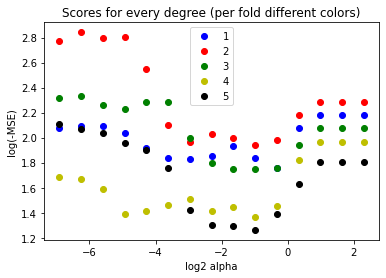

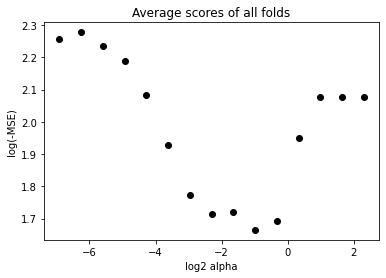

In [20]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np

# Initialize (pseudo-) random number generator with a seed
# for reproducibility of results
np.random.seed(40)

def do_gridsearch_alpha(X_train, y_train, X_test, y_test, alphas, crossvals=5, plot=True):
    """
    given a train and a test dataset, fit and evaluate polynomial regression models with given degrees
    
    Parameters: 
        X_train: 2D (Datapoints x features) numpy array
            the datapoints on which to train the models
        y_train: 1D (Targets) numpy array
            the targets on which to train the models
        X_test: 2D (Datapoints x features) numpy array
            the datapoints on which to test the models
        y_test: 1D (Targets) numpy array
            the targets on which to test the models
        alphas: 1D numpy array
             alpha candidates
        crossvals: int
            amount of cross-validation folds
        plot: bool
            True for plotting the MSE scores, False for surpressing the plots
    
    returns: 
        a GridSearchCV object, containing the fitted models for every degree polynomial
    """
    # Define the functions for polynomial features and linear regression
    Lassoreg = Lasso(max_iter=10000)
    scaler = StandardScaler()

    # Define the pipeline, containing the polynomial transformation and the subsequent linear regression
    model = Pipeline([
                     ("scaler", scaler),
                     ("lasso", Lassoreg)
                    ])

    # Define the hyperparameters for the Grid Search
    params = {'lasso__alpha': alphas}

    # Define a custom scoring system to evaluate the mean squared error (lower is better)
    mse = make_scorer(mean_squared_error,greater_is_better=False)

    # Define the Grid Search method
    gridsearch = GridSearchCV(model, params, scoring=mse, cv=crossvals)

    # Run Grid Search
    gridsearch.fit(X_train, y_train)
    y_pred = gridsearch.predict(X_test)
    MSE_test_set = mean_squared_error(y_test, y_pred)
    print(f'Mean squared error (test set): {MSE_test_set:.4}')
    if plot:
        # plot
        plt.figure()
        plt.title('Scores for every degree (per fold different colors)')
        colors = ['b.', 'r.', 'g.', 'y.', 'k.', 'c.']
        for i in range(crossvals):
            q = gridsearch.cv_results_[f'split{i}_test_score']
            plt.plot(np.log(params['lasso__alpha']), np.log(-q), colors[i%len(colors)], markersize=12)

        plt.xlabel('log2 alpha')
        plt.ylabel('log(-MSE)')
        plt.legend(list(range(1,crossvals+1)))

        # plot 2
        plt.figure()
        #plt.errorbar(np.log(params['lasso__alpha']), np.log(-gridsearch.cv_results_[f'mean_test_score']), np.log(gridsearch.cv_results_[f'std_test_score']), linestyle='None', marker='.',markersize=12)
        plt.plot(np.log(params['lasso__alpha']), np.log(-gridsearch.cv_results_[f'mean_test_score']), 'k.', markersize=12)
        plt.title('Average scores of all folds')
        plt.xlabel('log2 alpha')
        plt.ylabel('log(-MSE)');
    return gridsearch

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response)

alphaspace = np.logspace(-3, 1, num=15)
# Find optimal alpha
grids = do_gridsearch_alpha(X_train, y_train, X_test, y_test, alphaspace, 5)
alphamin = grids.best_params_['lasso__alpha']
print(alphamin)


feature_index = np.nonzero(grids.best_estimator_.named_steps['lasso'].coef_)
print(f"The selected features are: {gene_expression.columns.values[feature_index]}")


## Feature selection

Look at the features selected using the hyperparameter which corresponds to the minimum cross-validation error.

<p><font color='#770a0a'>Is the partition in training and validation sets playing a role in the selection of the hyperparameter? How will this affect the selection of the relevant features?</font></p>

<p><font color='#770a0a'>Should the value of the intercept also be shrunk to zero with Lasso and Ridge regression? Motivate your answer.</font></p>

### Answer

Partitioning in training and validation do play a role in selection of alpha as we can see in the different cross validation runs above, some subsets have the minimum at different points than others/the average. Different alphas will leave more or less features in the final model and thus affect the selection of features.

<font color='#FF0000'>Discussiepuntje Troy: Zouden we dit moeten aantonen voor de RNA expression dataset? Er wordt namelijk in de eerste zin gezegd 'look at the features selected using the hyperparameter ... '. Zo ja, Dit kunnen we op de volgende manier voor elkaar krijgen (wil ik wel doen, maar graag eerst even bespreken voor het geval jullie dit niet nodig vinden ;)): </font>
<br>
`best_alphas_per_K=[]`, `features_per_K=[]`
> Voor $K=1\,,2\,,\ldots\,,N$ (bv. $N=10$):
>>  `hyperparam_selector = GridSearch(K)`
    <br>`best_alpha = hyperparam_selector.best_params_['lasso__alpha']`
    <br>
    <br>`selected_features_idx = np.nonzero(grids.best_estimator_.named_steps['lasso'].coef_)`
    <br>`selected_features = gene_expression.columns.values[feature_index]`
    <br>
    <br>`best_alphas_per_K.append(best_alpha)`
    <br>`features_per_K.append(selected_features)`

Eventueel nog voor 2 of meer verschillende data shuffles + seed in het algemeen voor de lasso solver. 

The intercept should be seperate, as the intercept is merely a correction of the mean in a complex feature space and thus not relate to whether a feature has high enough impact and robustness to be taken into account in the final model

In [21]:
# Find the resulting coefficients for the best estimator (best alpha) -->
# Effect of training and val sets: rerun and check if below func is different
grids.best_estimator_.steps[1][1].coef_
# As we can see Lasso automatically seperates the intercept from the Regularization --> It is and should not be included
grids.best_estimator_.steps[1][1].intercept_

array([-2.48306306])

## Bias-variance 

Show the effect of the regularization on the parameter estimates in terms of bias and variance. For this you can repeat the optimization 100 times using bootstrap and visualise the profile of the Lasso regression coefficient over a grid of the hyperparameter, optionally including the variability as error bars.

<p><font color='#770a0a'>Based on the visual analysis of the plot, what are your observation on bias and variance in relation to model complexity? Motivate your answer.</font></p>

<font color='#FF0000'>Troy: Ik heb het nu zonder grid search gedaan. GridSearchCV heeft geen ondersteuning voor het retrieven van alle model coëfficiënten, alleen van de beste. Vorig jaar heb ik dit opgelost door een clone van GridSearchCV te maken en die zelf aan te passen (uiteraard in eigen code). Nu bedenk ik me wel dat GridSearch misschien helemaal niet nodig, aangezien er verder niet gevraagd wordt cross-validation toe te passen.   </font>


In [22]:
import typing

from sklearn.base import clone
from sklearn.model_selection import ParameterGrid
from sklearn.utils import resample


gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)
scorer = 'neg_mean_squared_error'

alphaspace = np.logspace(-3, 1, num=15)

def bootstrap_test_train_split(X: np.ndarray, y: np.ndarray, n_bootstrap_runs: int,
                               random_state: int = 0) -> \
                                    typing.Iterator[typing.Tuple[np.ndarray,
                                                                 np.ndarray,
                                                                 np.ndarray,
                                                                 np.ndarray]]:
    """
    A generator that samples X, y with replacement (used in bootstrapping) and splits
    into test ,train

    :param X: feature matrix
    :param y: target vector
    :param n_bootstrap_runs: amount of times the data is resampled
    :param random_state: random state of random number generators
    :yield: X and y resampled and split into train, test (X_train, X_test, y_train, y_test)
    """
    for i in range(n_bootstrap_runs):
        # Bootstrapping is sampling WITH replacement
        Xsampled, ysampled = resample(X, y, random_state=random_state+i, replace=True)

        yield train_test_split(Xsampled, ysampled, shuffle=False)

    

MSEs = np.zeros((100, alphaspace.shape[0]))
coefs = np.zeros((100, alphaspace.shape[0], gene_expression.shape[1]))

for i, (X_train, X_test, y_train, y_test) in enumerate(bootstrap_test_train_split(gene_expression,
                                                                                drug_response,
                                                                                100,
                                                                                40)):
    Lassoreg = Lasso(max_iter=10000)
    scaler = StandardScaler()

    # Define the pipeline
    model = Pipeline([
                     ("scaler", scaler),
                     ("lasso", Lassoreg)
                    ])
    
    params = {'lasso__alpha': alphaspace}
    
    for j, param in enumerate(ParameterGrid(params)): 
        model_ = clone(model)
              
        model_.set_params(**param)
    
        model_.fit(X_train, y_train)
              
        y_pred = model_.predict(X_test)
              
        MSEs[i, j] = mean_squared_error(y_test, y_pred)

        coefs[i, j, ...] = model_.named_steps['lasso'].coef_
    


C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1868389747333207, tolerance: 0.08938402270270271
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10569852327901312, tolerance: 0.0803819936936937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.08363917593681658, tolerance: 0.0803819936936937
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10028607186833736, tolerance: 0.08712555027027027
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2716229710327273, tolerance: 0.09289655243243242
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10943404904704096, tolerance: 0.08989792396396395
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergenc

C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.11742998360034154, tolerance: 0.09420305099099101
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.17425652231720454, tolerance: 0.08911387963963964
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.1108143045041315, tolerance: 0.0802500027027027
  model = cd_fast.enet_coordinate_descent(
C:\Users\Troy\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: Convergence

In [25]:
# TO DO: plotting + answer

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

## Logistic regression

<p><font color='#770a0a'>Write the expression of the objective function for the penalized logistic regression with $L_1$ and $L_2$ regularisation (as in Elastic net).</font></p>